In [1]:
import numpy as np 
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%config InlineBackend.figure_format = 'svg'

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
matplotlib.rcParams.update({'font.size': 14})

In [6]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

In [7]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head()

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0  11809          27    3.0  115.027311         NaN           10.0      4   
1   3013          22    1.0   39.832524   23.169223            8.0      7   
2   8215           1    3.0   78.342215   47.671972           10.0      2   
3   2352           1    1.0   40.409907         NaN            1.0     10   
4  13866          94    2.0   64.285067   38.562517            9.0     16   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0        10.0       2014   0.075424         B         B        11      3097   
1         8.0       1966   0.118537         B         B        30      6207   
2        17.0       1988   0.025609         B         B        33      5261   
3        22.0       1977   0.007122         B         B         1       264   
4        16.0       1972   0.282798         B         B        33      8667   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         0           NaN            0        0       B  305018.871089  
1         1        1183.0            1        0       B  177734.553407  
2         0         240.0            3        1       B  282078.720850  
3         0           NaN            0        1       B  168106.007630  
4         2           NaN            0        6       B  343995.102962

In [8]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  4567          44    1.0  36.847630   19.094182            5.0      5   
1  5925          62    1.0  42.493907   42.568133           10.0      7   
2   960          27    2.0  59.463678         NaN            9.0     19   
3  3848          23    3.0  49.646030   33.893825            6.0      2   
4   746          74    1.0  53.837056         NaN            1.0      8   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1970   0.036122         B         B        24      4378   
1        17.0       2017   0.072158         B         B         2       629   
2        19.0       1977   0.211401         B         B         9      1892   
3         2.0       1965   0.014073         B         B         2       475   
4        17.0       1977   0.309479         B         B        35      7715   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
0         0        1036.0            1        1       B  
1         1           NaN            0        0       A  
2         0           NaN            0        1       B  
3         0           NaN            0        0       B  
4         4         990.0            0        6       B

In [9]:
print(f'Форма трейна \t{train_df.shape} \nФорма теста \t{test_df.shape}')

Форма трейна 	(10000, 20) 
Форма теста 	(5000, 19)


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

## Обработка данных

### Площадь  и жилая площадь

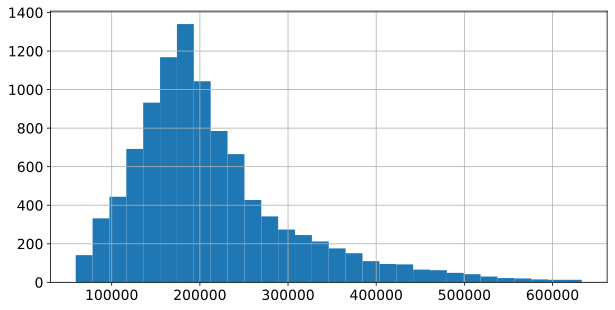

In [11]:
train_df['Price'].hist(figsize = (10, 5), bins = 30)
plt.show()

In [12]:
train_df['Square'].describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [13]:
train_df.loc[train_df['Square'] < 20]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
161    6782          45    1.0   2.954309    5.257278            1.0      3   
328    4504          27    3.0   4.390331    5.610772            1.0      8   
1401   9487           5    1.0   5.129222    5.549458            1.0      1   
3686  15877          57    3.0  16.547242   16.698571            8.0      5   
4496  15744          34    1.0   1.988943    2.642219            1.0     21   
4800   7657          38    1.0   4.502784    4.618547            1.0     28   
5009  11526          27    1.0   4.633498    1.969969            1.0     18   
5870   6927          21    1.0  16.117154    8.822988            0.0      2   
6632  13685           0    1.0  17.498542   13.446544            0.0      7   
7033   1748          88    2.0   5.497061   67.628717            1.0     24   
7209  14236           0    1.0  19.927423   15.541536            0.0      2   
7470  14786           1    1.0   1.136859    4.525736            1.0      3   
8330    523         101    1.0  18.509177   15.170851            3.0      5   
8501  12927          62    2.0  17.414181         NaN            1.0      4   
8572  10202           6    1.0   2.596351    4.604943            1.0      3   
8805  10527          27    1.0   4.380726   40.805837            1.0     10   
9067  13265           1    3.0   4.823679   79.767964            0.0      6   
9286  12676          81    3.0  13.784865   15.988889            7.0      4   
9349  15127         150    1.0  17.046188   20.036232            8.0      7   
9869   3224          27    0.0   2.377248    0.873147            0.0      1   
9990  10635          21    1.0  18.983962   11.419796            2.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
161          1.0       1977   0.195781         B         B        23   
328         19.0       2016   0.211401         B         B         9   
1401         1.0       1977   0.150818         B         B        16   
3686         5.0       1962   0.133215         B         B        49   
4496         4.0       1977   0.069753         B         B        53   
4800         1.0       1977   0.060753         B         B        15   
5009         1.0       1977   0.011654         B         B         4   
5870         5.0       1965   0.194489         B         B        47   
6632         5.0       1961   0.319809         B         B        25   
7033        22.0       1977   0.127376         B         B        43   
7209         5.0       1962   0.319809         B         B        25   
7470         1.0       1977   0.007122         B         B         1   
8330         5.0       1970   0.225825         A         B        41   
8501        20.0       1977   0.072158         B         B         2   
8572        25.0       2014   0.243205         B         B         5   
8805        17.0       2013   0.211401         B         B         9   
9067        17.0       1977   0.007122         B         B         1   
9286         5.0       1960   0.319809         B         B        25   
9349        12.0       1982   0.300323         B         B        52   
9869         0.0       1977   0.017647         B         B         2   
9990         5.0       1967   0.194489         B         B        47   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
161       5212         6           NaN            3        2       B   
328       1892         0           NaN            0        1       B   
1401      3433         4        2643.0            4        5       B   
3686     11395         3        1406.0            3        4       A   
4496     13670         4           NaN            1       11       B   
4800      2787         2         520.0            0        7       B   
5009       915         0           NaN            0        0       B   
5870      8004         3         125.0            3        5       B   
6632      4756        16        2857.

Убираю строчки с больной площадью квартиры

In [14]:
train_df = train_df.drop(np.where(train_df['Square'] < 13)[0])

In [15]:
train_df['Square'].describe()

count    9988.000000
mean       56.378989
std        20.992154
min        13.784865
25%        41.787090
50%        52.539909
75%        65.925548
max       641.065193
Name: Square, dtype: float64

In [16]:
train_df.loc[train_df['Square'] > 150]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
403   13434          13    5.0  183.382273  100.985505           15.0      2   
726      28           9    2.0  604.705972         NaN            1.0     17   
730   14181          62    3.0  156.636577  153.685835            1.0      1   
1449  11764          93    3.0  169.117203         NaN            1.0      5   
1606   3718          56    3.0  190.857689  107.376164           19.0      7   
1776  16568          27    4.0  200.334539  201.627361           25.0      1   
1906   5548          86    5.0  275.645284  233.949309           26.0     12   
2066  14556         183    4.0  151.150660   98.187482           23.0      6   
2790  15947         129    4.0  185.906396   84.830074           31.0      5   
3182   3914          24    4.0  155.930023   76.831293           15.0      6   
3204   5621          23    3.0  163.495333  161.504222           12.0      5   
4444   5602          93    3.0  169.385184         NaN            1.0      2   
5258  10678          17    4.0  170.016872         NaN            0.0     12   
5283  11055         151    1.0  174.649522  174.837082           15.0     10   
5764   6674          54    1.0  168.086347  125.486563           30.0     18   
5844   4991          93    3.0  167.767027         NaN            1.0      1   
6030  15362          23    1.0  163.286965  161.155275            1.0      4   
6450   2603          30    3.0  162.587886  164.526757            0.0      2   
7010   2307         102    1.0  409.425181  410.639749           10.0      4   
7644   7917          27    0.0  212.932361  211.231125            0.0      2   
8011   3233         129    4.0  186.692602   87.487080           32.0      3   
8044   5376          93    2.0  170.379494         NaN            1.0      3   
8872   5300          30    3.0  169.509941  170.713651            1.0      2   
9037  16204          23    1.0  160.647588         NaN            1.0      3   
9229  11602          30    2.0  641.065193  638.163193           10.0     20   
9307   4249          23    5.0  198.930182  123.139863           10.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
403          6.0       1997   0.090799         B         B        74   
726         18.0       1977   0.161532         B         B        25   
730          3.0       2005   0.072158         B         B         2   
1449         3.0       1977   0.004949         B         B         0   
1606         3.0       2007   0.000000         B         B        23   
1776         2.0       2013   0.041116         B         B        53   
1906        37.0       2011   0.161976         B         A        31   
2066         7.0       1912   0.037316         B         B        32   
2790         3.0       2015   0.020741         B         B        24   
3182        22.0       2012   0.111627         B         B        50   
3204         3.0       1977   0.014073         B         B         2   
4444        10.0       1977   0.004949         B         B         0   
5258         0.0       1977   0.093443         B         B        23   
5283        12.0       1958   0.236108         B         B        16   
5764        28.0       2011   0.006076         B         B        30   
5844         1.0       1977   0.004949         B         B         0   
6030         3.0       1977   0.014073         B         B         2   
6450         3.0       1977   0.000078         B         B        22   
7010         4.0       2016   0.238617         B         B        26   
7644         3.0       2008   0.211401         B         B         9   
8011         3.0       2011   0.020741         B         B        24   
8044         2.0       1977   0.004949         B         B         0   
8872         2.0       2018   0.000078         B         B        22   
9037         3.0       1977   0.014073         B         B         2   
9229        19.0       2019   0.000078         B

In [17]:
train_df['LifeSquare'].describe()

count    7875.000000
mean       37.227904
std        86.297538
min         0.370619
25%        22.801159
50%        32.786353
75%        45.135249
max      7480.592129
Name: LifeSquare, dtype: float64

In [18]:
condition = (train_df['LifeSquare'].isna()) | (train_df['LifeSquare'] > train_df['Square']) 

In [19]:
life_square_coeff = (train_df['Square']/train_df['LifeSquare']).mean()
life_square_coeff

2.1274583965770204

In [20]:
train_df.loc[condition, 'LifeSquare'] = (train_df.loc[condition, 'Square'] / 2)

In [21]:
train_df.loc[train_df['LifeSquare'] < train_df['LifeSquare'].quantile(.025), 'LifeSquare'] = train_df.loc[train_df['LifeSquare'] < train_df['LifeSquare'].quantile(.025), 'Square'] / 2

In [22]:
train_df['LifeSquare'].describe()

count    9988.000000
mean       33.961645
std        15.910559
min         6.892432
25%        22.545268
50%        31.435369
75%        41.104619
max       638.163193
Name: LifeSquare, dtype: float64

In [23]:
train_df['LifeSquare'].value_counts()

28.003539    1
90.124517    1
40.708329    1
31.807667    1
20.908958    1
            ..
34.789599    1
39.983584    1
39.800041    1
37.408810    1
48.832456    1
Name: LifeSquare, Length: 9988, dtype: int64

### Площадь кухни

In [24]:
train_df['KitchenSquare'].value_counts()

1.0       2450
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        695
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
43.0         2
112.0        2
41.0         2
32.0         2
58.0         2
25.0         2
37.0         2
30.0         2
51.0         2
40.0         1
96.0         1
48.0         1
72.0         1
73.0         1
2014.0       1
66.0         1
36.0         1
78.0         1
54.0         1
29.0         1
31.0         1
35.0         1
62.0         1
39.0         1
1970.0       1
60.0         1
75.0         1
26.0         1
21.0         1
84.0         1
63.0         1
123.0        1
53.0         1
42.0         1
23.0         1
27.0         1
Name: KitchenSquare, dtype: int64

In [25]:
condition = (train_df['KitchenSquare'].isna()) \
             | (train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.975))
        
train_df.loc[condition, 'KitchenSquare'] = train_df['KitchenSquare'].median()

train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [26]:
train_df['KitchenSquare'].value_counts()

3.0     3171
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
4.0       39
Name: KitchenSquare, dtype: int64

### Этажи

In [27]:
train_df['HouseFloor'].value_counts()

17.0     2329
9.0      1389
12.0     1074
5.0      1031
14.0      625
16.0      576
1.0       492
25.0      373
22.0      342
0.0       268
24.0      176
8.0       141
10.0      135
4.0       133
3.0       127
15.0      123
19.0      107
20.0      105
18.0       89
7.0        59
6.0        58
2.0        48
23.0       40
21.0       33
11.0       28
13.0       27
30.0       21
40.0        7
27.0        6
32.0        4
37.0        4
28.0        3
99.0        2
48.0        2
39.0        2
44.0        1
36.0        1
26.0        1
45.0        1
29.0        1
38.0        1
47.0        1
117.0       1
31.0        1
Name: HouseFloor, dtype: int64

In [28]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [29]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

1818

In [30]:
train_df['HouseFloor_outlier'] = 0
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'HouseFloor_outlier'] = 1

In [31]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

In [32]:
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index
floor_outliers

Int64Index([  17,   19,   21,   25,   26,   33,   34,   37,   39,   44,
            ...
            9913, 9921, 9930, 9931, 9938, 9953, 9960, 9968, 9970, 9975],
           dtype='int64', length=1604)

In [33]:
import random

In [34]:
train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor']\
                                                .apply(lambda x: random.randint(1, x))

In [35]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

0

In [36]:
train_df['HouseFloor'].sort_values().unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  36.,
        37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

***

In [37]:
train_df.drop('Healthcare_1', axis=1, inplace=True)

In [38]:
train_df['Rooms'].value_counts()

2.0     3879
1.0     3697
3.0     2233
4.0      150
5.0       18
0.0        7
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  9988 non-null   int64  
 1   DistrictId          9988 non-null   int64  
 2   Rooms               9988 non-null   float64
 3   Square              9988 non-null   float64
 4   LifeSquare          9988 non-null   float64
 5   KitchenSquare       9988 non-null   float64
 6   Floor               9988 non-null   int64  
 7   HouseFloor          9988 non-null   float64
 8   HouseYear           9988 non-null   int64  
 9   Ecology_1           9988 non-null   float64
 10  Ecology_2           9988 non-null   object 
 11  Ecology_3           9988 non-null   object 
 12  Social_1            9988 non-null   int64  
 13  Social_2            9988 non-null   int64  
 14  Social_3            9988 non-null   int64  
 15  Helthcare_2         9988 non-null   int64  
 16  Shops_

### год постройки

In [40]:
train_df['HouseYear'].sort_values().unique()

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

In [41]:
train_df['HouseYear'].value_counts()

1977        2643
2017         308
2016         304
2015         299
2014         209
            ... 
1947           1
1916           1
1910           1
1928           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

In [42]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [43]:
binary_to_numbers = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  9988 non-null   int64  
 1   DistrictId          9988 non-null   int64  
 2   Rooms               9988 non-null   float64
 3   Square              9988 non-null   float64
 4   LifeSquare          9988 non-null   float64
 5   KitchenSquare       9988 non-null   float64
 6   Floor               9988 non-null   int64  
 7   HouseFloor          9988 non-null   float64
 8   HouseYear           9988 non-null   int64  
 9   Ecology_1           9988 non-null   float64
 10  Ecology_2           9988 non-null   int64  
 11  Ecology_3           9988 non-null   int64  
 12  Social_1            9988 non-null   int64  
 13  Social_2            9988 non-null   int64  
 14  Social_3            9988 non-null   int64  
 15  Helthcare_2         9988 non-null   int64  
 16  Shops_

In [45]:
class DataPreprocessing:
    def __init__(self):
        self.medians = None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
        
    def transform(self, X):
        #X = X.drop(np.where(X['Square'] < 13), axis=1, inplace=True) #площадь
        
        #жилая площадь
        life_square_coeff = (X['Square'] / X['LifeSquare']).mean()
        condition = (X['LifeSquare'].isna()) | (X['LifeSquare'] > X['Square']) | (X['LifeSquare'] < X['LifeSquare'].quantile(.025))
        X.loc[condition, 'LifeSquare'] = (X.loc[condition, 'Square'] / life_square_coeff)
        
        #Площадь кухни
        condition = (X['KitchenSquare'].isna()) | (X['KitchenSquare'] > self.kitchen_square_quantile)        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']
        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        
        #Этажи
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        #Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        X.fillna(self.medians, inplace=True)

        return X

In [46]:
def floor_to_cat(X):

    X['floor_cat'] = 0

    X.loc[X['Floor'] <= 3, 'floor_cat'] = 1  
    X.loc[(X['Floor'] > 3) & (X['Floor'] <= 5), 'floor_cat'] = 2
    X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'floor_cat'] = 3
    X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'floor_cat'] = 4
    X.loc[X['Floor'] > 15, 'floor_cat'] = 5
    
    return X 
        
def year_to_cat(X):

    X['year_cat'] = 0

    X.loc[X['HouseYear'] <= 1941, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1941) & (X['HouseYear'] <= 1945), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'year_cat'] = 5
    X.loc[(X['HouseYear'] > 2010), 'year_cat'] = 6
    
    return X 

def binary_to_numbers(X):
    
    binary_to_numbers = {'A': 0, 'B': 1}

    X['Ecology_2'] = X['Ecology_2'].replace(binary_to_numbers)
    X['Ecology_3'] = X['Ecology_3'].replace(binary_to_numbers)
    X['Shops_2'] = X['Shops_2'].replace(binary_to_numbers)
    
    return X

In [47]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'HouseFloor_outlier']

In [48]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2', 'HouseFloor_outlier', 'floor_cat', 'year_cat']
target_name = 'Price'

In [49]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

X = train_df.drop(columns=target_name)
y = train_df[target_name]

### Разбивка на тренировочный и валидационный

In [50]:
import seaborn as sns

In [64]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(13, 7))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=66)

In [53]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 19), (3300, 19), (5000, 19))

In [54]:
X_train = floor_to_cat(X_train)
X_valid = floor_to_cat(X_valid)
test_df = floor_to_cat(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 20), (3300, 20), (5000, 20))

In [55]:
X_train = year_to_cat(X_train)
X_valid = year_to_cat(X_valid)
test_df = year_to_cat(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 21), (3300, 21), (5000, 21))

In [56]:
X_train = binary_to_numbers(X_train)
X_valid = binary_to_numbers(X_valid)
test_df = binary_to_numbers(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 21), (3300, 21), (5000, 21))

In [57]:
X_train = X_train[feature_names]
X_valid = X_valid[feature_names]
test_df = test_df[feature_names]

In [58]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

In [59]:
rf_model = RandomForestRegressor(random_state=66)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=66, verbose=0, warm_start=False)

Train R2:	0.964
Test R2:	0.689


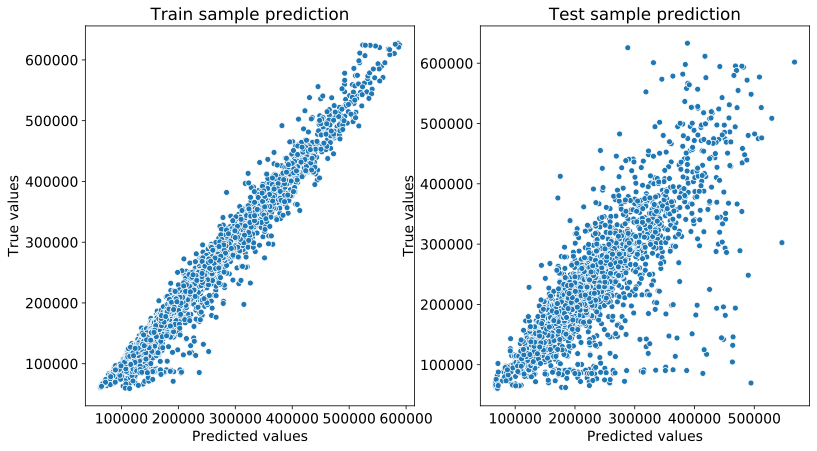

In [65]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [61]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV()
lasso_model.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

Train R2:	0.31
Test R2:	0.365


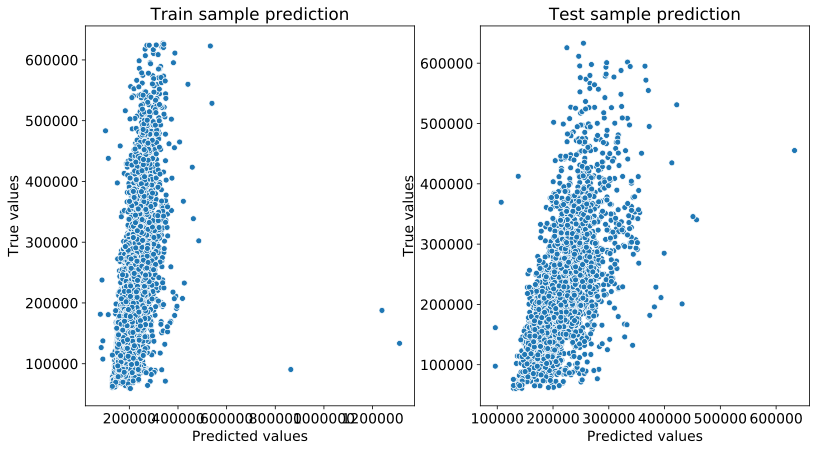

In [66]:
y_train_preds = lasso_model.predict(X_train)
y_test_preds = lasso_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [69]:
from sklearn.linear_model import RidgeCV
ridge_model = RidgeCV()
ridge_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

Train R2:	0.31
Test R2:	0.365


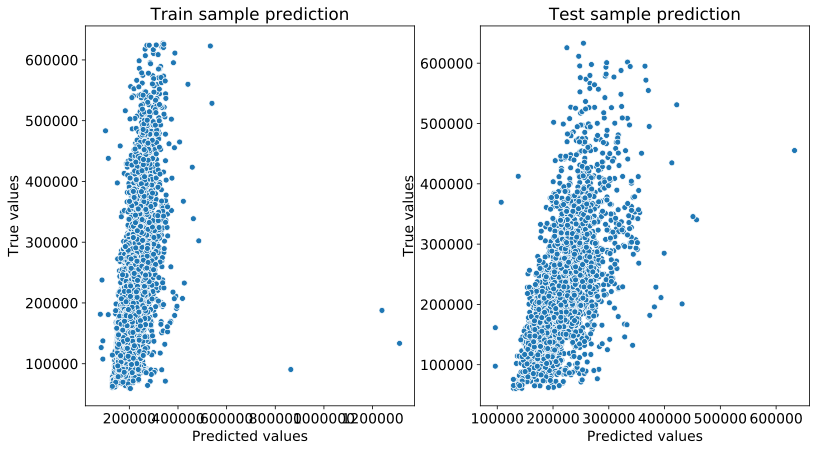

In [70]:
y_train_preds = lasso_model.predict(X_train)
y_test_preds = lasso_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
reg_model = GradientBoostingRegressor(random_state=66)
reg_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=66, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Train R2:	0.768
Test R2:	0.695


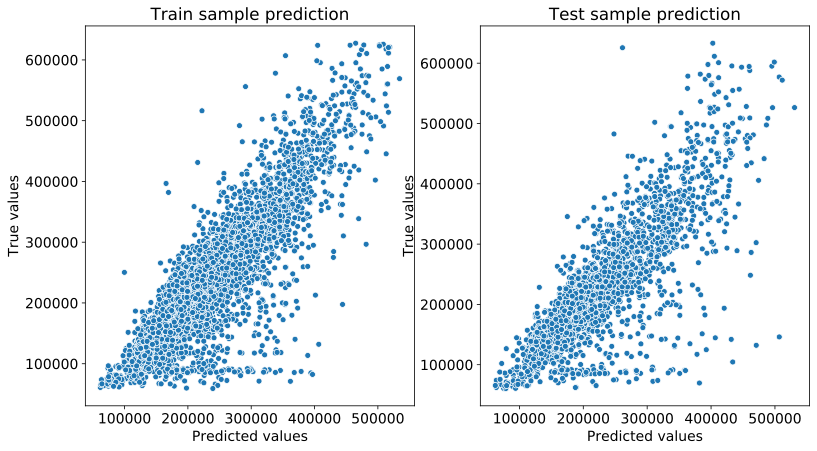

In [73]:
y_train_preds = reg_model.predict(X_train)
y_test_preds = reg_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [78]:
from sklearn.model_selection import KFold, GridSearchCV

In [79]:
params = {'n_estimators': [50, 100, 200, 400],
         'max_depth': [3, 5, 7, 10]}
gs = GridSearchCV(reg_model, params, scoring='r2', cv=KFold(n_splits=5,
                                                           random_state=66,
                                                           shuffle=True),
                 n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=66, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                             

In [81]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [88]:
reg_model = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=66)
reg_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=66, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Train R2:	0.904
Test R2:	0.702


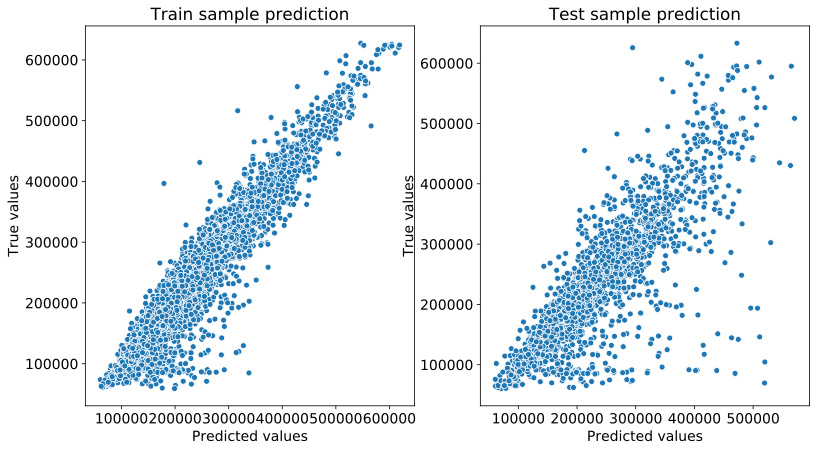

In [89]:
y_train_preds = reg_model.predict(X_train)
y_test_preds = reg_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [90]:
cv_score = cross_val_score(reg_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.740741  , 0.74959389, 0.72679685])

In [91]:
cv_score.mean()

0.7390439128394087

In [92]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

feature_name  importance
1               Square    0.526607
11            Social_2    0.147666
0                Rooms    0.114115
10            Social_1    0.103092
12            Social_3    0.047428
7            Ecology_1    0.018051
2           LifeSquare    0.012833
14             Shops_1    0.010716
6            HouseYear    0.008066
3        KitchenSquare    0.006981
5           HouseFloor    0.001317
13         Helthcare_2    0.000972
4                Floor    0.000787
18            year_cat    0.000706
17           floor_cat    0.000584
16  HouseFloor_outlier    0.000045
15             Shops_2    0.000034
8            Ecology_2    0.000000
9            Ecology_3    0.000000

In [93]:
submit = pd.read_csv('./sample_submission.csv')
submit.head()

Id     Price
0  4567  200000.0
1  5925  200000.0
2   960  200000.0
3  3848  200000.0
4   746  200000.0

In [94]:
predictions = reg_model.predict(test_df)
predictions

array([168353.65962057, 117148.88080313, 131196.77966104, ...,
       143411.61392834, 191620.36955966, 290553.32183453])

In [99]:
len(predictions)

5000

In [95]:
submit['Price'] = predictions
submit.head()

Id          Price
0  4567  168353.659621
1  5925  117148.880803
2   960  131196.779661
3  3848  117781.886451
4   746  181266.751592

In [96]:
submit.to_csv('reg_submit.csv', index=False)